In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carregando os dados
#('/content/winequality-red.csv')
df = pd.read_csv('/content/sample_data/winequality-red.csv')

In [ ]:
# Separando features (X) e target (y)
X = df.drop('quality', axis=1)  # Assumindo que a coluna target se chama 'quality'
y = df['quality']

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pd.Series(y_train).value_counts()


,count
quality,
5,545
6,510
7,159
4,42
8,15
3,8


In [ ]:
pd.Series(y_test).value_counts()

,count
quality,
5,136
6,128
7,40
4,11
8,3
3,2


In [ ]:
# Criando diferentes pipelines com diferentes classificadores
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='rbf'))
    ]),
    'Random Forest': Pipeline([
        ('classifier', RandomForestClassifier(n_estimators=100))
    ])
}


In [ ]:
# Treinando e avaliando cada modelo
results = {}
for name, pipeline in pipelines.items():
    # Treinamento
    pipeline.fit(X_train, y_train)

    # Predições
    y_pred = pipeline.predict(X_test)

    # Métricas
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, zero_division=0),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


In [ ]:
# Visualização dos resultados
def plot_results():
    # Gráfico de barras com acurácia
    plt.figure(figsize=(10, 6))
    accuracies = [results[name]['accuracy'] for name in pipelines.keys()]
    plt.bar(pipelines.keys(), accuracies)
    plt.title('Comparação de Acurácia entre Modelos')
    plt.ylabel('Acurácia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Matrizes de confusão
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    for i, (name, result) in enumerate(results.items()):
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', ax=axes[i])
        axes[i].set_title(f'Matriz de Confusão - {name}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Feature Importance para Random Forest
def plot_feature_importance():
    rf_pipeline = pipelines['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_pipeline.named_steps['classifier'].feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Importância das Features (Random Forest)')
    plt.tight_layout()
    plt.show()

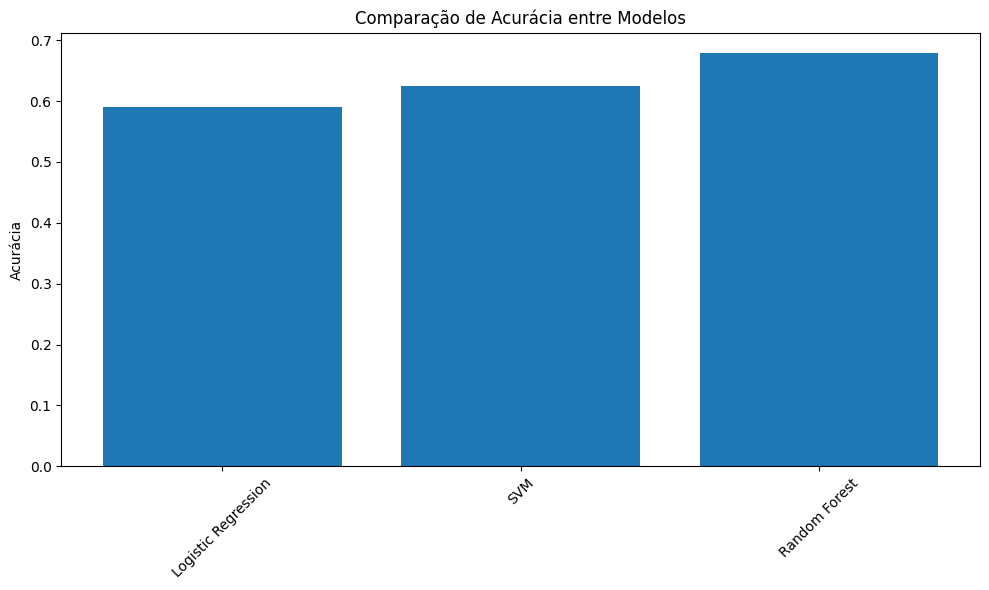

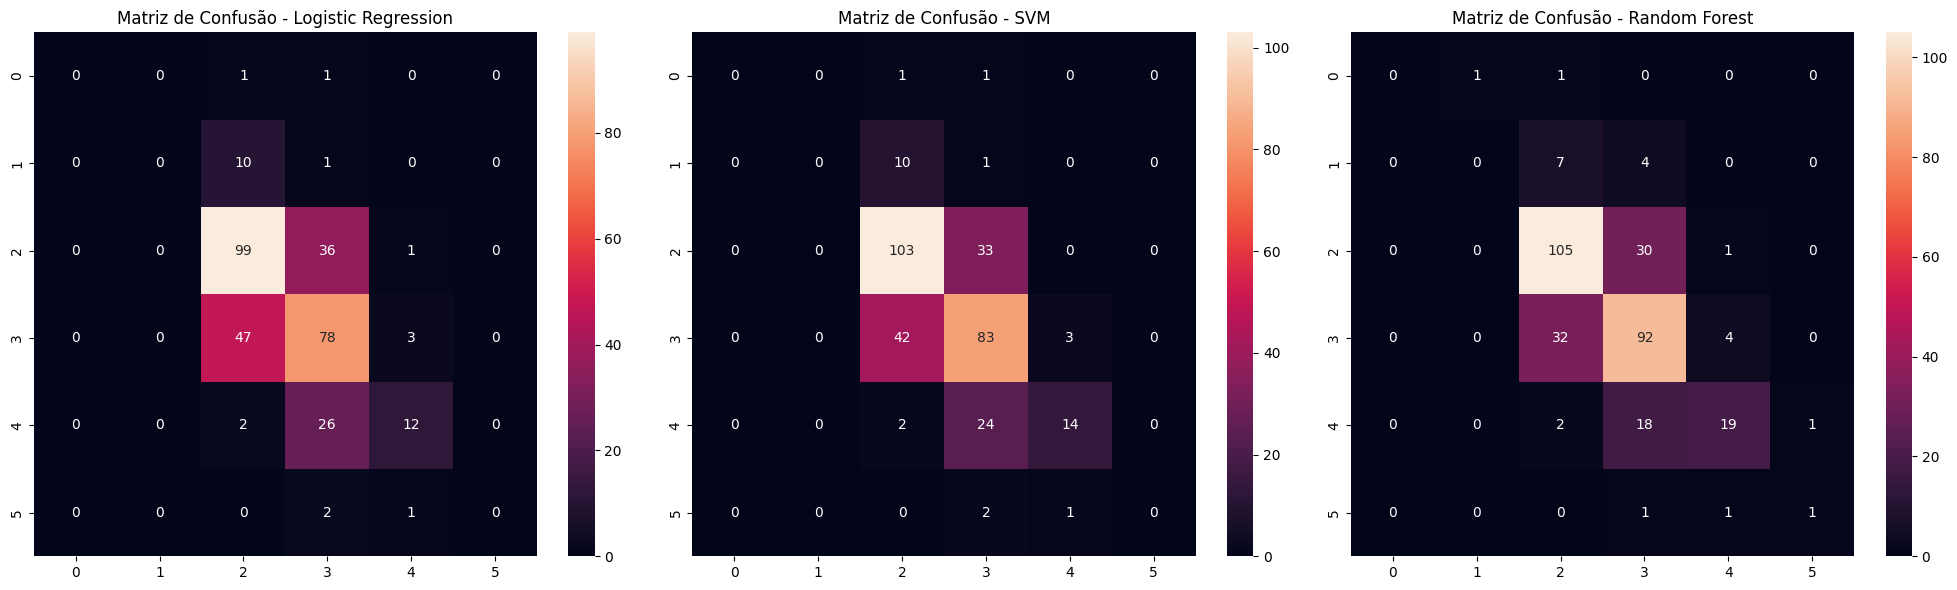

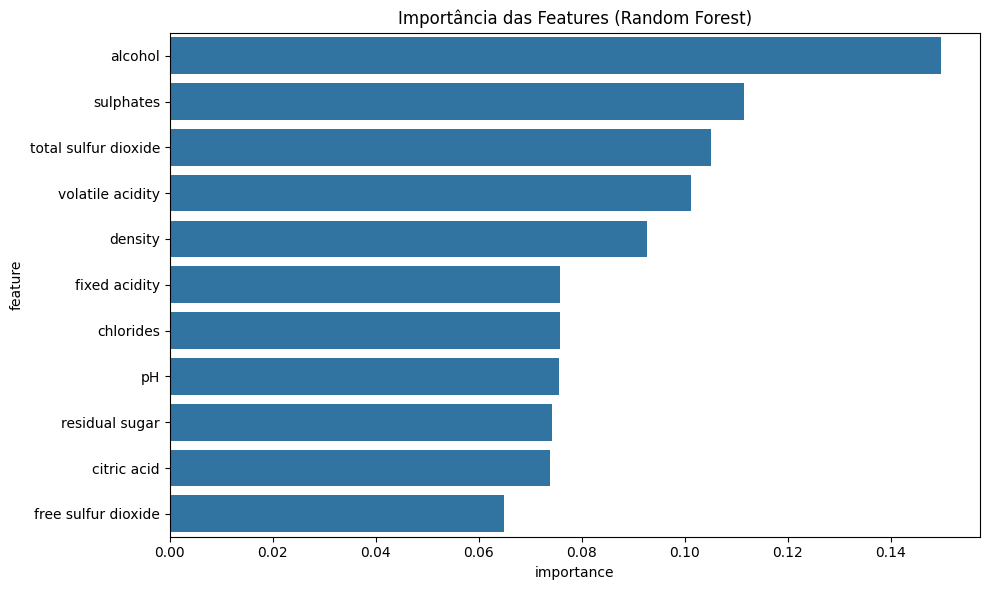

In [ ]:
# Executando as visualizações
plot_results()
plot_feature_importance()

In [ ]:
# Imprimindo relatórios detalhados
for name, result in results.items():
    print(f"\nRelatório de Classificação - {name}")
    print("="*50)
    print(result['report'])


Relatório de Classificação - Logistic Regression
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.73      0.67       136
           6       0.54      0.61      0.57       128
           7       0.71      0.30      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.57      0.59      0.57       320


Relatório de Classificação - SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.76      0.70       136
           6       0.58      0.65      0.61       128
           7       0.78      0.35      0.48        40
           8       0.00      0.00      0.00     

In [ ]:
# Cross-validation para validação adicional
cv_scores = {}
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5)
    cv_scores[name] = {
        'mean': scores.mean(),
        'std': scores.std()
    }

print("\nResultados da Validação Cruzada:")
print("="*50)
for name, scores in cv_scores.items():
    print(f"{name}:")
    print(f"Acurácia média: {scores['mean']:.4f} (+/- {scores['std']*2:.4f})")


Resultados da Validação Cruzada:
Logistic Regression:
Acurácia média: 0.5823 (+/- 0.0932)
SVM:
Acurácia média: 0.5872 (+/- 0.0655)
Random Forest:
Acurácia média: 0.5697 (+/- 0.0620)


## Estratégias de Oversampling para balanceamento de **classes**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
# Carregando os dados
# /content/winequality-red.csv
df = pd.read_csv('/content/sample_data/winequality-red.csv')

In [ ]:
# Separando features (X) e target (y)
X = df.drop('quality', axis=1)
y = df['quality']

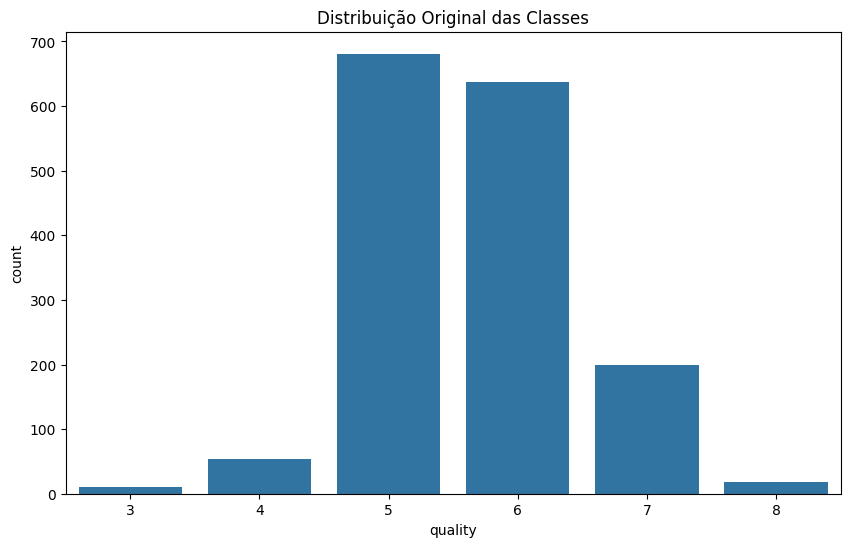

Distribuição original das classes:
Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


In [ ]:
# Visualizando a distribuição original das classes
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribuição Original das Classes')
plt.show()

print("Distribuição original das classes:")
print(Counter(y))

In [ ]:
# Definindo a estratégia de balanceamento
# Vamos fazer todas as classes terem pelo menos 159 amostras (número da classe 7)
strategy = {3: 159, 4: 159, 8: 159}

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Criando diferentes pipelines com diferentes classificadores e SMOTE
pipelines = {
    'Logistic Regression': ImbPipeline([
        ('scaler', StandardScaler()),
        ('sampler', SMOTE(sampling_strategy=strategy, random_state=42)),
        ('classifier', LogisticRegression(multi_class='multinomial', max_iter=1000))
    ]),
    'SVM': ImbPipeline([
        ('scaler', StandardScaler()),
        ('sampler', SMOTE(sampling_strategy=strategy, random_state=42)),
        ('classifier', SVC(kernel='rbf'))
    ]),
    'Random Forest': ImbPipeline([
        ('scaler', StandardScaler()),
        ('sampler', SMOTE(sampling_strategy=strategy, random_state=42)),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ])
}


Treinando Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


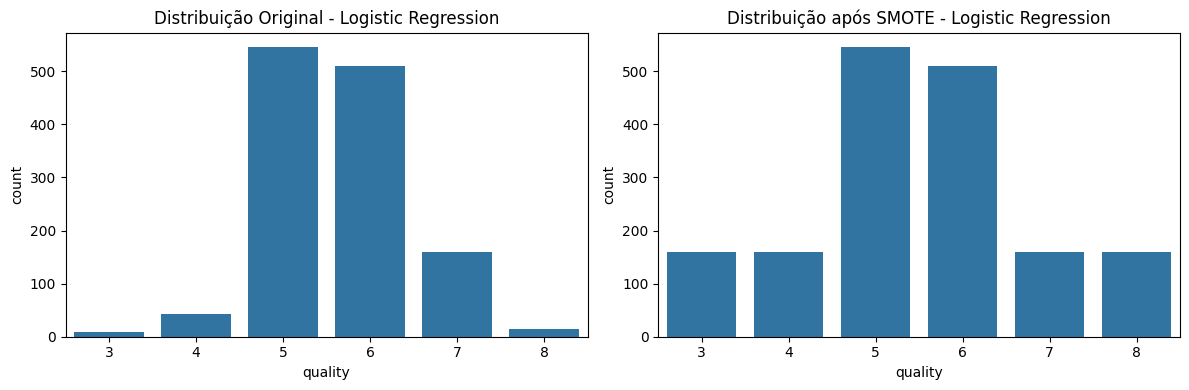


Treinando SVM...


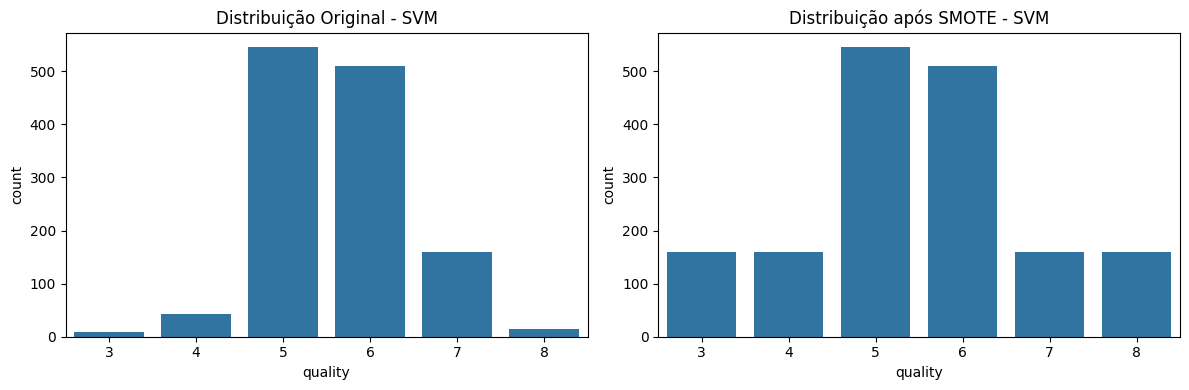


Treinando Random Forest...


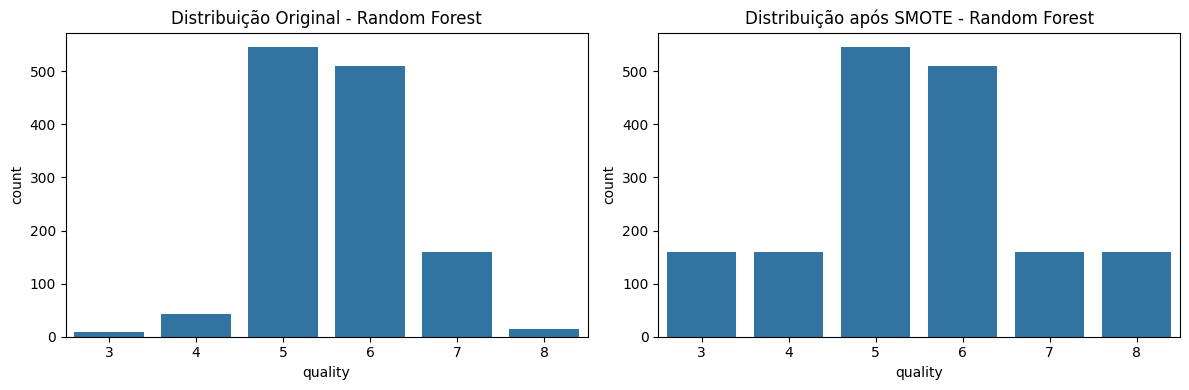

In [ ]:
# Treinando e avaliando cada modelo
results = {}
for name, pipeline in pipelines.items():
    print(f"\nTreinando {name}...")

    # Treinamento
    pipeline.fit(X_train, y_train)

    # Predições
    y_pred = pipeline.predict(X_test)

    # Métricas
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Mostrando a distribuição após SMOTE para os dados de treino
    y_resampled = pipeline.named_steps['sampler'].fit_resample(
        pipeline.named_steps['scaler'].fit_transform(X_train),
        y_train
    )[1]

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.countplot(x=y_train)
    plt.title(f'Distribuição Original - {name}')

    plt.subplot(122)
    sns.countplot(x=y_resampled)
    plt.title(f'Distribuição após SMOTE - {name}')
    plt.tight_layout()
    plt.show()


In [ ]:
# Visualização dos resultados
def plot_results():
    # Gráfico de barras com acurácia
    plt.figure(figsize=(10, 6))
    accuracies = [results[name]['accuracy'] for name in pipelines.keys()]
    plt.bar(pipelines.keys(), accuracies)
    plt.title('Comparação de Acurácia entre Modelos (com SMOTE)')
    plt.ylabel('Acurácia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Matrizes de confusão
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    for i, (name, result) in enumerate(results.items()):
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', ax=axes[i])
        axes[i].set_title(f'Matriz de Confusão - {name}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Feature Importance para Random Forest
def plot_feature_importance():
    rf_pipeline = pipelines['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_pipeline.named_steps['classifier'].feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Importância das Features (Random Forest com SMOTE)')
    plt.tight_layout()
    plt.show()

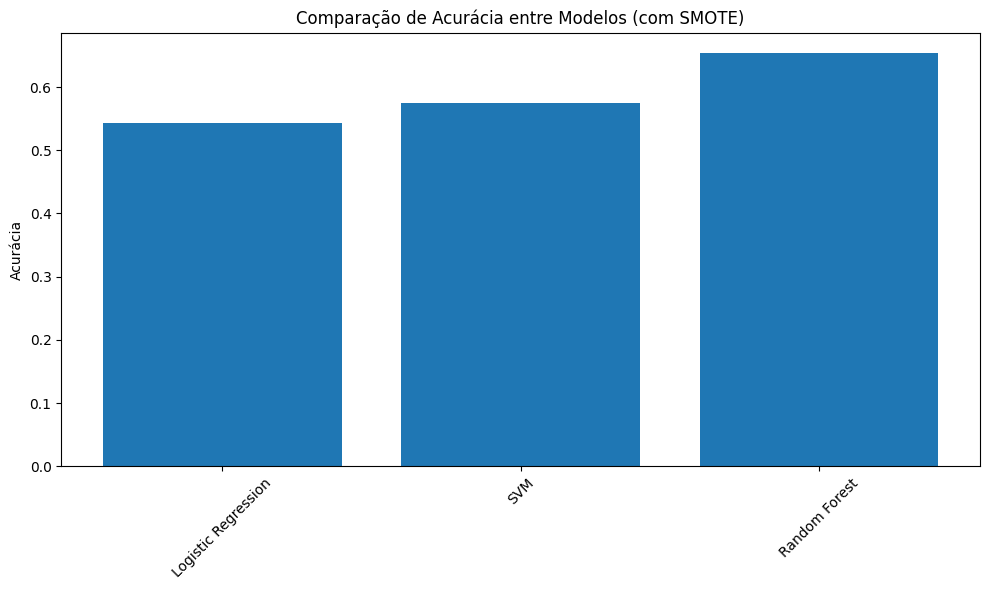

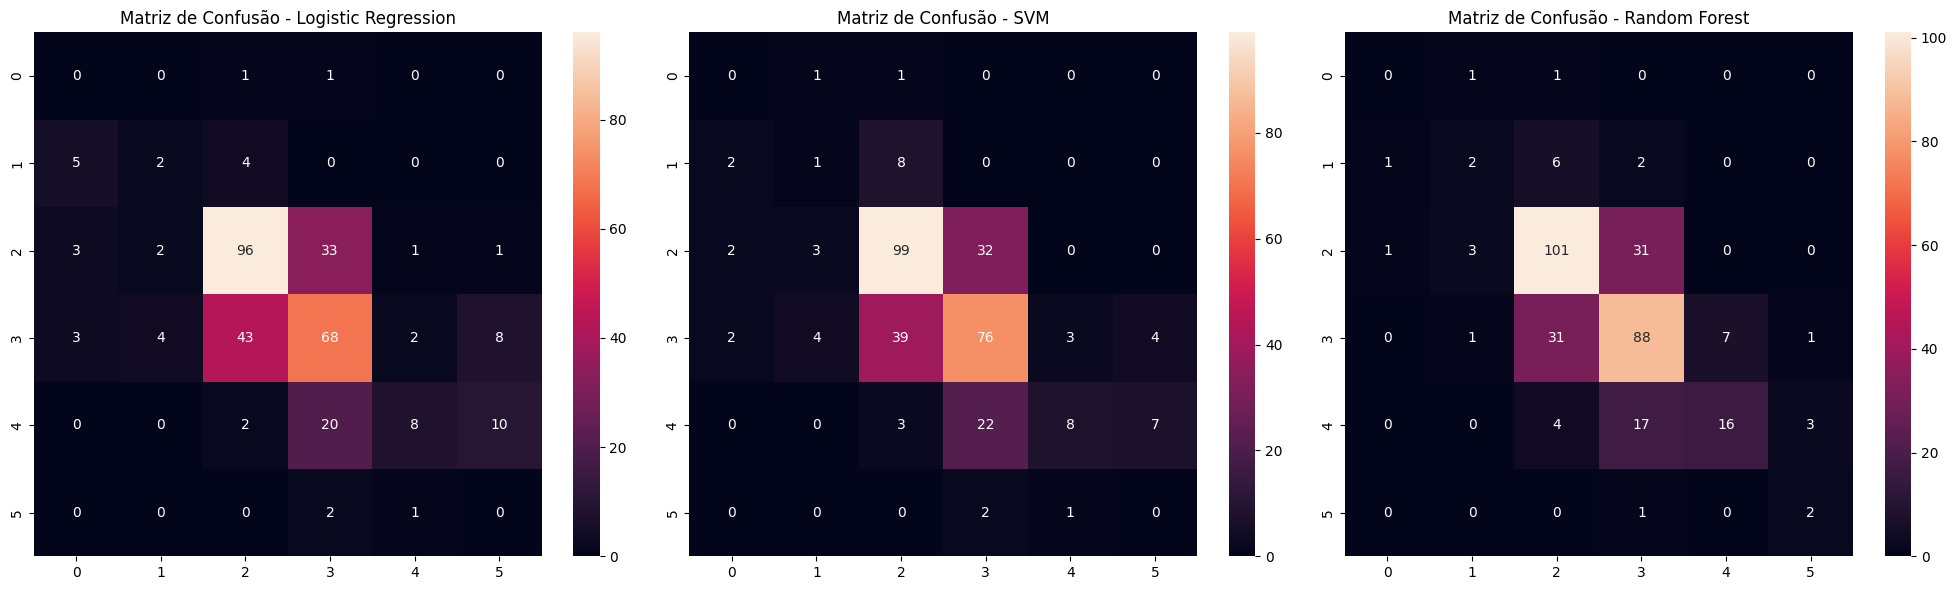

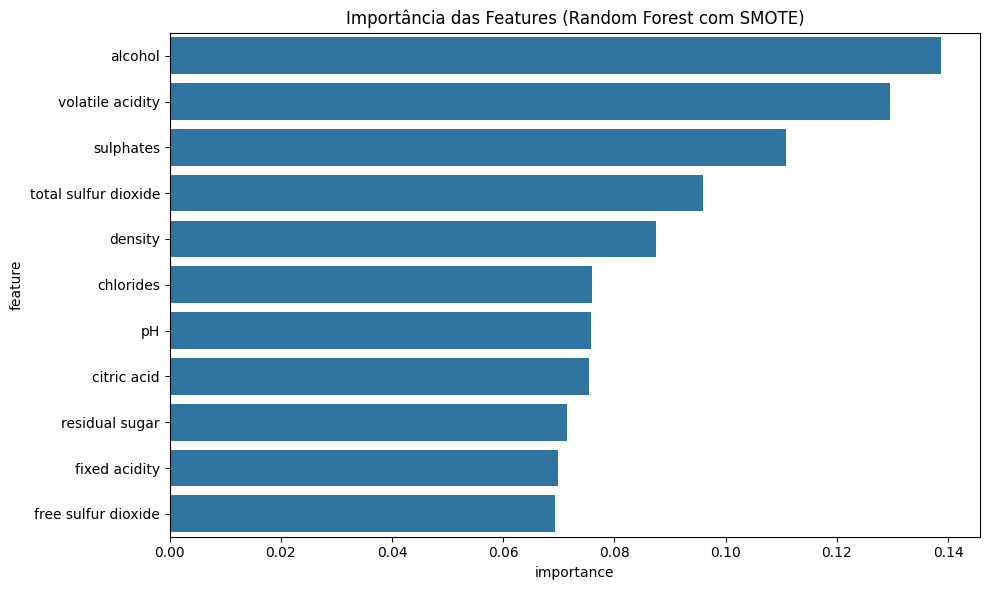

In [ ]:
# Executando as visualizações
plot_results()
plot_feature_importance()

In [ ]:
# Imprimindo relatórios detalhados
for name, result in results.items():
    print(f"\nRelatório de Classificação - {name}")
    print("="*50)
    print(result['report'])


Relatório de Classificação - Logistic Regression
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.18      0.21        11
           5       0.66      0.71      0.68       136
           6       0.55      0.53      0.54       128
           7       0.67      0.20      0.31        40
           8       0.00      0.00      0.00         3

    accuracy                           0.54       320
   macro avg       0.35      0.27      0.29       320
weighted avg       0.59      0.54      0.55       320


Relatório de Classificação - SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.11      0.09      0.10        11
           5       0.66      0.73      0.69       136
           6       0.58      0.59      0.58       128
           7       0.67      0.20      0.31        40
           8       0.00      0.00      0.00     

In [ ]:
# Cross-validation para validação adicional
cv_scores = {}
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5)
    cv_scores[name] = {
        'mean': scores.mean(),
        'std': scores.std()
    }

print("\nResultados da Validação Cruzada:")
print("="*50)
for name, scores in cv_scores.items():
    print(f"{name}:")
    print(f"Acurácia média: {scores['mean']:.4f} (+/- {scores['std']*2:.4f})")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi


Resultados da Validação Cruzada:
Logistic Regression:
Acurácia média: 0.5279 (+/- 0.0632)
SVM:
Acurácia média: 0.5410 (+/- 0.0411)
Random Forest:
Acurácia média: 0.5316 (+/- 0.0479)


# **Solução multivariada**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Separando features e target
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Definindo estratégia de balanceamento
strategy = {3: 159, 4: 159, 8: 159}  # Mesmo número da classe 7

In [ ]:
# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Criando pipelines com LDA e QDA
pipelines = {
    'LDA': ImbPipeline([
        ('scaler', StandardScaler()),
        ('sampler', SMOTE(sampling_strategy=strategy, random_state=42)),
        ('classifier', LinearDiscriminantAnalysis())
    ]),
    'QDA': ImbPipeline([
        ('scaler', StandardScaler()),
        ('sampler', SMOTE(sampling_strategy=strategy, random_state=42)),
        ('classifier', QuadraticDiscriminantAnalysis())
    ])
}

In [ ]:
# Função para plotar projeções LDA
def plot_lda_projections(X, y, lda, title):
    X_lda = lda.transform(X)

    plt.figure(figsize=(12, 6))

    # Plot das duas primeiras componentes LDA
    plt.subplot(121)
    for i in np.unique(y):
        mask = y == i
        plt.scatter(X_lda[mask, 0], X_lda[mask, 1], label=f'Classe {i}')
    plt.xlabel('Primeira Componente LDA')
    plt.ylabel('Segunda Componente LDA')
    plt.title(f'Projeção LDA - {title}')
    plt.legend()

    # Plot da distribuição das classes na primeira componente
    plt.subplot(122)
    for i in np.unique(y):
        mask = y == i
        sns.kdeplot(data=X_lda[mask, 0], label=f'Classe {i}')
    plt.xlabel('Primeira Componente LDA')
    plt.ylabel('Densidade')
    plt.title('Distribuição das Classes na 1ª Componente')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Função para plotar importância das features
def plot_feature_importance(lda, feature_names):
    # Calculando a importância das features baseada nos coeficientes LDA
    importance = np.abs(lda.coef_).mean(axis=0)

    # Criando DataFrame com importância das features
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # Plotando
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Importância das Features (LDA)')
    plt.tight_layout()
    plt.show()

    return feature_importance


Treinando LDA...

Visualizando projeções LDA...


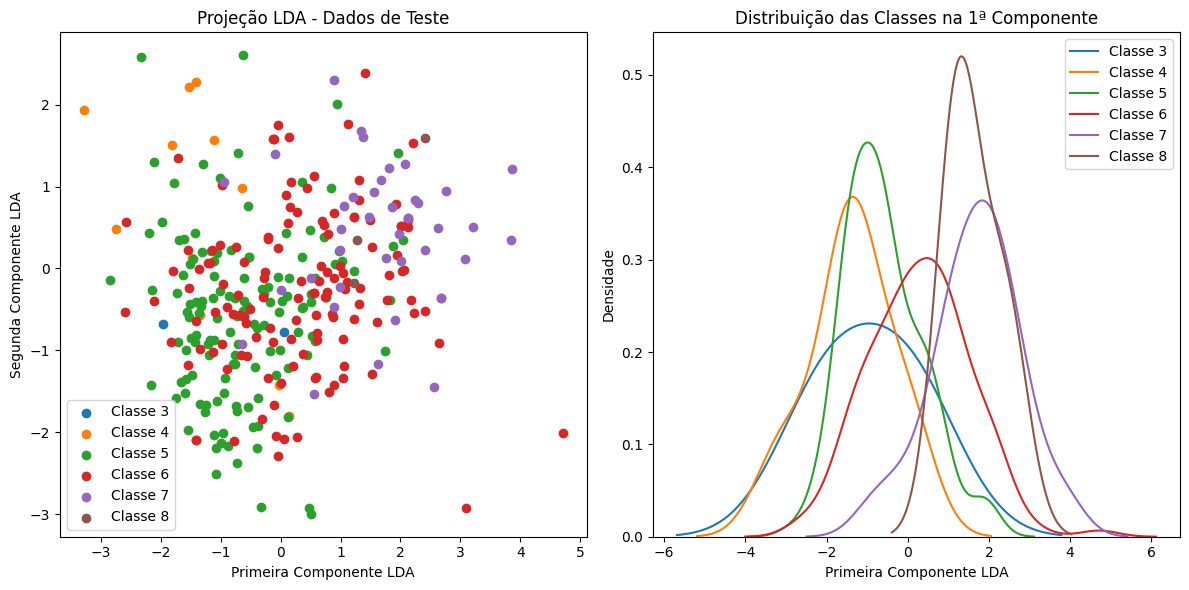


Importância das features no LDA:


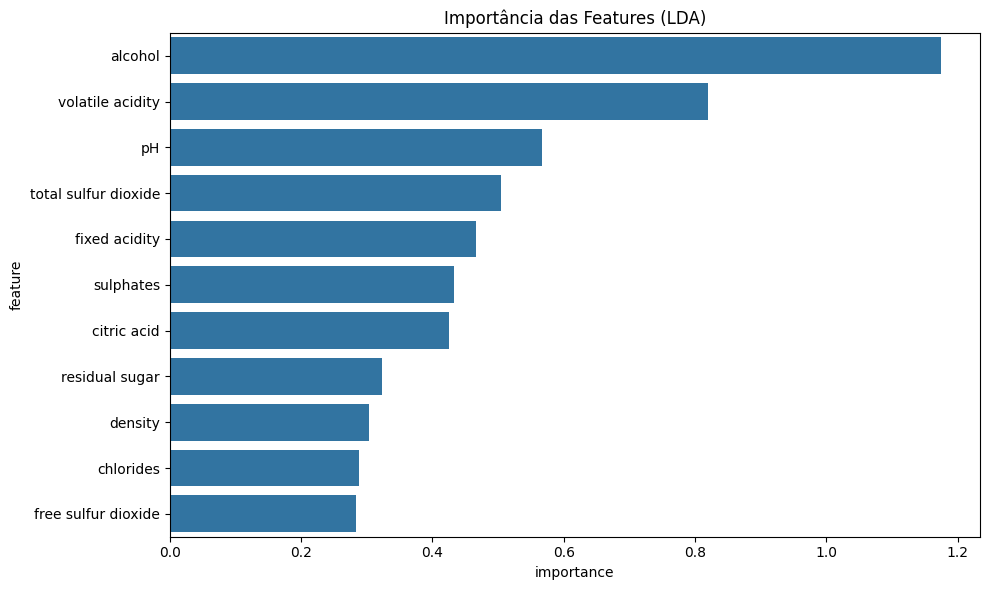

                 feature  importance
10               alcohol    1.175137
1       volatile acidity    0.819659
8                     pH    0.566999
6   total sulfur dioxide    0.504756
0          fixed acidity    0.467207
9              sulphates    0.432684
2            citric acid    0.425112
3         residual sugar    0.322731
7                density    0.304040
4              chlorides    0.289009
5    free sulfur dioxide    0.284232

Treinando QDA...


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is il

In [ ]:
# Treinando e avaliando modelos
results = {}
for name, pipeline in pipelines.items():
    print(f"\nTreinando {name}...")

    # Treinamento
    pipeline.fit(X_train, y_train)

    # Predições
    y_pred = pipeline.predict(X_test)

    # Métricas
    results[name] = {
        'report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Para LDA, plotar projeções e importância das features
    if name == 'LDA':
        print("\nVisualizando projeções LDA...")
        plot_lda_projections(
            pipeline.named_steps['scaler'].transform(X_test),
            y_test,
            pipeline.named_steps['classifier'],
            'Dados de Teste'
        )

        print("\nImportância das features no LDA:")
        feature_imp = plot_feature_importance(
            pipeline.named_steps['classifier'],
            X.columns
        )
        print(feature_imp)

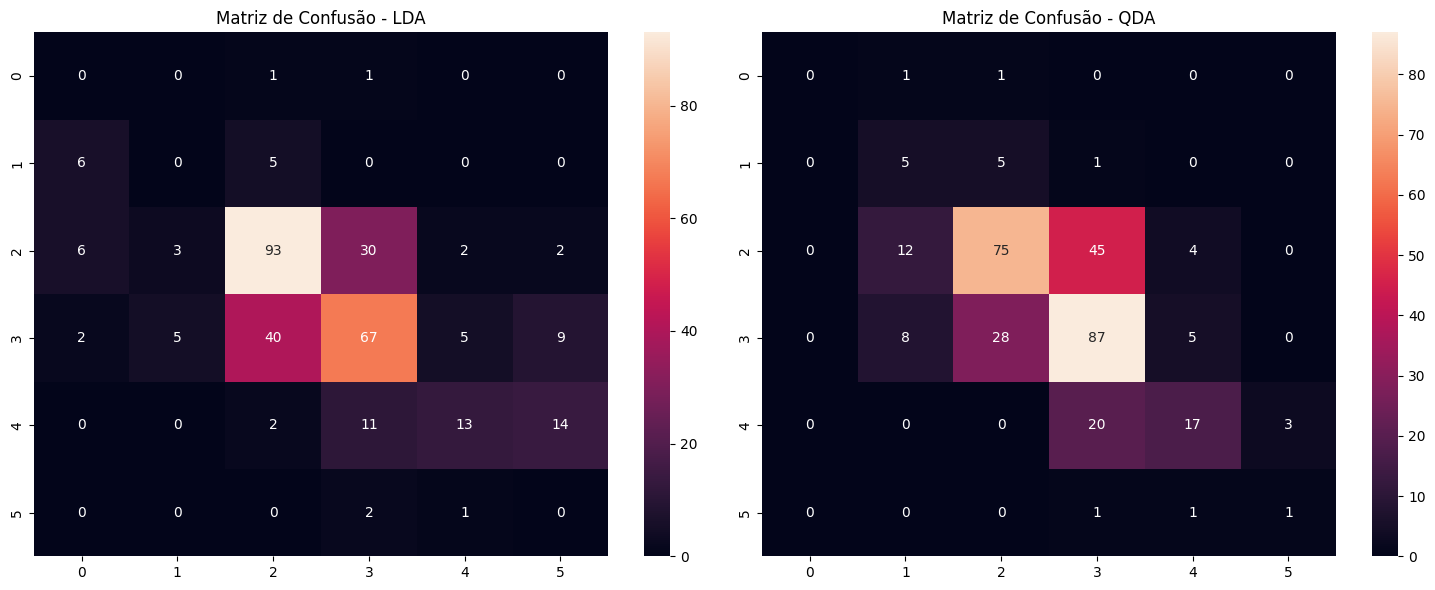

In [ ]:
# Plotando matrizes de confusão
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusão - {name}')
plt.tight_layout()
plt.show()

In [ ]:
# Imprimindo relatórios de classificação
for name, result in results.items():
    print(f"\nRelatório de Classificação - {name}")
    print("="*50)
    print(result['report'])


Relatório de Classificação - LDA
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.68      0.67       136
           6       0.60      0.52      0.56       128
           7       0.62      0.33      0.43        40
           8       0.00      0.00      0.00         3

    accuracy                           0.54       320
   macro avg       0.31      0.26      0.28       320
weighted avg       0.60      0.54      0.56       320


Relatório de Classificação - QDA
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.19      0.45      0.27        11
           5       0.69      0.55      0.61       136
           6       0.56      0.68      0.62       128
           7       0.63      0.42      0.51        40
           8       0.25      0.33      0.29         3

    accur

In [ ]:
# Validação cruzada
print("\nResultados da Validação Cruzada:")
print("="*50)
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"\n{name}:")
    print(f"Acurácia média: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")


Resultados da Validação Cruzada:

LDA:
Acurácia média: 0.5228 (+/- 0.0305)

QDA:
Acurácia média: 0.4878 (+/- 0.0977)


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

In [ ]:

# Análise das componentes discriminantes
for name, pipeline in pipelines.items():
    if name == 'LDA':
        lda = pipeline.named_steps['classifier']
        print(f"\nVariância explicada por cada componente discriminante:")
        explained_variance_ratio = lda.explained_variance_ratio_
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.4f}")


Variância explicada por cada componente discriminante:
Componente 1: 0.7029
Componente 2: 0.2455
Componente 3: 0.0355
Componente 4: 0.0093
Componente 5: 0.0068


# **Classificação com Análise de Componentes Principais**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Separando features e target
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Definindo estratégia de balanceamento
strategy = {3: 159, 4: 159, 8: 159}

In [ ]:
# Criando pipelines com diferentes classificadores usando PCA
pipelines = {
    'LDA com PCA': ImbPipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=3)),  # Usando 3 componentes principais
        ('sampler', SMOTE(sampling_strategy=strategy, random_state=42)),
        ('classifier', LinearDiscriminantAnalysis())
    ]),
    'Random Forest com PCA': ImbPipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=3)),
        ('sampler', SMOTE(sampling_strategy=strategy, random_state=42)),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

In [ ]:
# Função para analisar e visualizar PCA
def analyze_pca(X, y, pca_fitted):
    # Variância explicada
    print("\nVariância explicada por componente:")
    for i, var in enumerate(pca_fitted.explained_variance_ratio_):
        print(f"PC{i+1}: {var:.4f} ({var*100:.1f}%)")
    print(f"Variância acumulada: {np.sum(pca_fitted.explained_variance_ratio_):.4f}")

    # Contribuição das features originais
    loadings = pd.DataFrame(
        pca_fitted.components_.T,
        columns=[f'PC{i+1}' for i in range(pca_fitted.n_components_)],
        index=X.columns
    )

    # Plot de loadings
    plt.figure(figsize=(12, 6))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('Contribuição das Features para cada Componente Principal')
    plt.tight_layout()
    plt.show()

    # Transformando os dados
    X_pca = pca_fitted.transform(X)

    # Scatter plot das duas primeiras componentes
    plt.figure(figsize=(12, 5))

    # PC1 vs PC2
    plt.subplot(121)
    for classe in np.unique(y):
        mask = y == classe
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                   label=f'Classe {classe}', alpha=0.6)
    plt.xlabel('Primeira Componente Principal')
    plt.ylabel('Segunda Componente Principal')
    plt.title('PC1 vs PC2')
    plt.legend()

    # PC2 vs PC3
    plt.subplot(122)
    for classe in np.unique(y):
        mask = y == classe
        plt.scatter(X_pca[mask, 1], X_pca[mask, 2],
                   label=f'Classe {classe}', alpha=0.6)
    plt.xlabel('Segunda Componente Principal')
    plt.ylabel('Terceira Componente Principal')
    plt.title('PC2 vs PC3')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return loadings

In [ ]:
# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)


Treinando LDA com PCA...

Análise PCA para LDA com PCA:

Variância explicada por componente:
PC1: 0.2836 (28.4%)
PC2: 0.1743 (17.4%)
PC3: 0.1396 (14.0%)
Variância acumulada: 0.5974


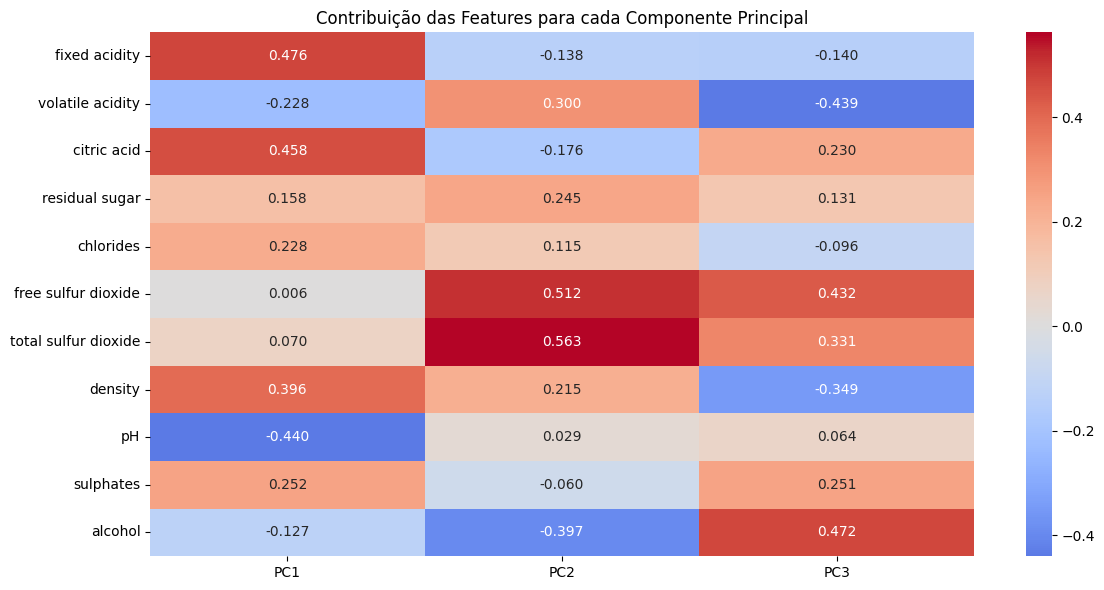

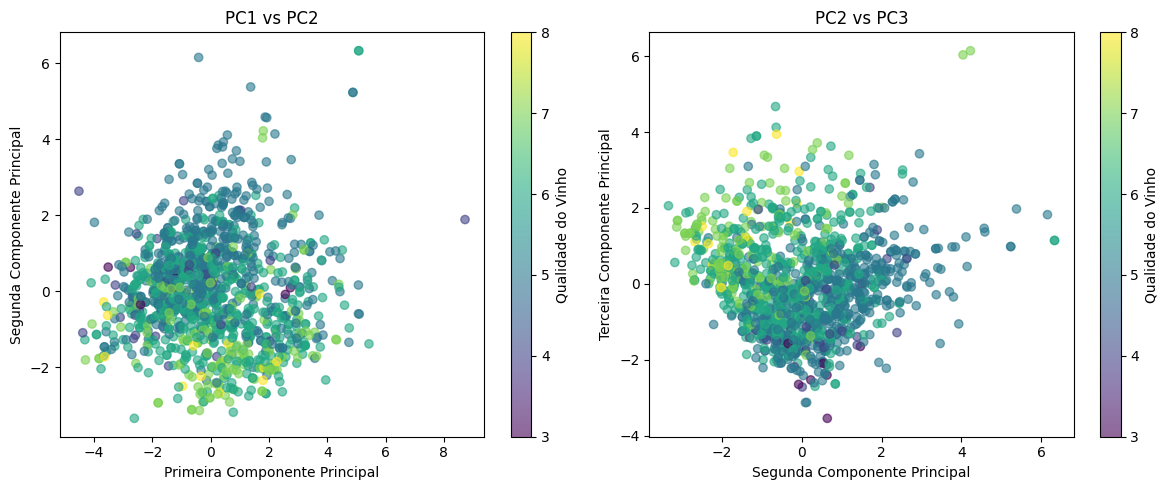


Features mais importantes para cada componente:

PC1:
alcohol          0.126667
chlorides        0.228084
citric acid      0.458435
density          0.395816
fixed acidity    0.475546
Name: PC1, dtype: float64

PC2:
alcohol          0.396793
chlorides        0.115369
citric acid      0.176467
density          0.214976
fixed acidity    0.137801
Name: PC2, dtype: float64

PC3:
alcohol          0.471544
chlorides        0.096407
citric acid      0.230143
density          0.349446
fixed acidity    0.140364
Name: PC3, dtype: float64

Treinando Random Forest com PCA...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Análise PCA para Random Forest com PCA:

Variância explicada por componente:
PC1: 0.2836 (28.4%)
PC2: 0.1743 (17.4%)
PC3: 0.1396 (14.0%)
Variância acumulada: 0.5974


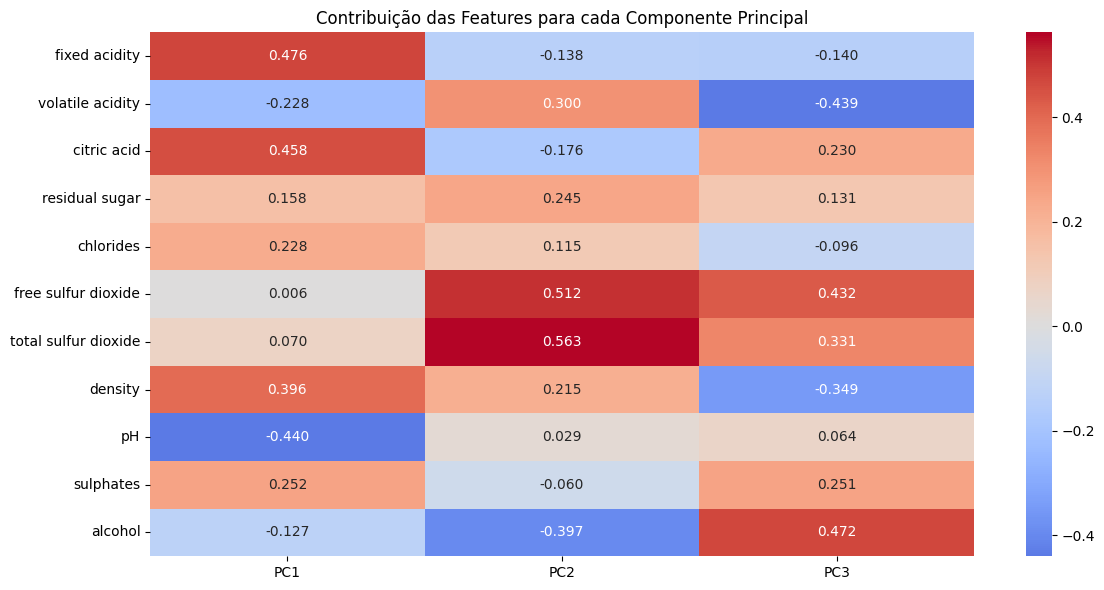

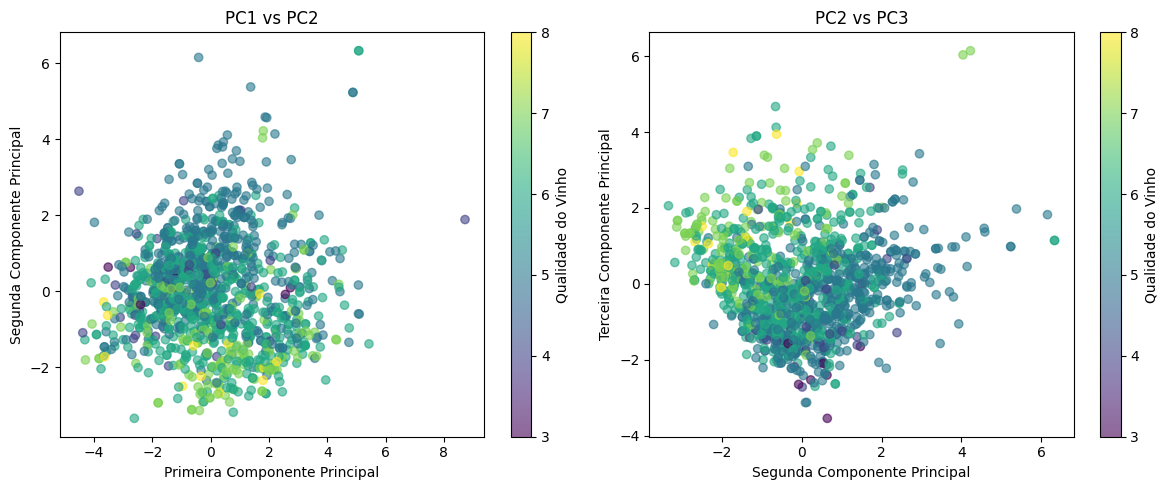


Features mais importantes para cada componente:

PC1:
alcohol          0.126667
chlorides        0.228084
citric acid      0.458435
density          0.395816
fixed acidity    0.475546
Name: PC1, dtype: float64

PC2:
alcohol          0.396793
chlorides        0.115369
citric acid      0.176467
density          0.214976
fixed acidity    0.137801
Name: PC2, dtype: float64

PC3:
alcohol          0.471544
chlorides        0.096407
citric acid      0.230143
density          0.349446
fixed acidity    0.140364
Name: PC3, dtype: float64


In [ ]:
# Função corrigida para analisar e visualizar PCA
def analyze_pca(X, y, pca_fitted, feature_names):
    """
    Analisa e visualiza os resultados do PCA

    Parameters:
    X: array-like, dados transformados pelo StandardScaler
    y: array-like, variável target
    pca_fitted: PCA fitted object
    feature_names: list, nomes das features originais
    """
    # Variância explicada
    print("\nVariância explicada por componente:")
    for i, var in enumerate(pca_fitted.explained_variance_ratio_):
        print(f"PC{i+1}: {var:.4f} ({var*100:.1f}%)")
    print(f"Variância acumulada: {np.sum(pca_fitted.explained_variance_ratio_):.4f}")

    # Contribuição das features originais
    loadings = pd.DataFrame(
        pca_fitted.components_.T,
        columns=[f'PC{i+1}' for i in range(pca_fitted.n_components_)],
        index=feature_names
    )

    # Plot de loadings
    plt.figure(figsize=(12, 6))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, fmt='.3f')
    plt.title('Contribuição das Features para cada Componente Principal')
    plt.tight_layout()
    plt.show()

    # Transformando os dados
    X_pca = pca_fitted.transform(X)

    # Scatter plot das duas primeiras componentes
    plt.figure(figsize=(12, 5))

    # PC1 vs PC2
    plt.subplot(121)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
                         cmap='viridis', alpha=0.6)
    plt.xlabel('Primeira Componente Principal')
    plt.ylabel('Segunda Componente Principal')
    plt.title('PC1 vs PC2')
    plt.colorbar(scatter, label='Qualidade do Vinho')

    # PC2 vs PC3
    plt.subplot(122)
    scatter = plt.scatter(X_pca[:, 1], X_pca[:, 2], c=y,
                         cmap='viridis', alpha=0.6)
    plt.xlabel('Segunda Componente Principal')
    plt.ylabel('Terceira Componente Principal')
    plt.title('PC2 vs PC3')
    plt.colorbar(scatter, label='Qualidade do Vinho')

    plt.tight_layout()
    plt.show()

    # Análise adicional das contribuições
    abs_loadings = abs(loadings)
    importance_per_pc = pd.DataFrame({
        'PC1': abs_loadings['PC1'].sort_values(ascending=False),
        'PC2': abs_loadings['PC2'].sort_values(ascending=False),
        'PC3': abs_loadings['PC3'].sort_values(ascending=False)
    })

    print("\nFeatures mais importantes para cada componente:")
    print("\nPC1:")
    print(importance_per_pc['PC1'].head())
    print("\nPC2:")
    print(importance_per_pc['PC2'].head())
    print("\nPC3:")
    print(importance_per_pc['PC3'].head())

    return loadings

# Treinando e avaliando modelos
results = {}
for name, pipeline in pipelines.items():
    print(f"\nTreinando {name}...")

    # Treinamento
    pipeline.fit(X_train, y_train)

    # Análise do PCA
    print(f"\nAnálise PCA para {name}:")
    loadings = analyze_pca(
        pipeline.named_steps['scaler'].transform(X_train),
        y_train,
        pipeline.named_steps['pca'],
        X.columns  # Passando os nomes das features
    )

    # Predições
    y_pred = pipeline.predict(X_test)

    # Métricas
    results[name] = {
        'report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'loadings': loadings
    }

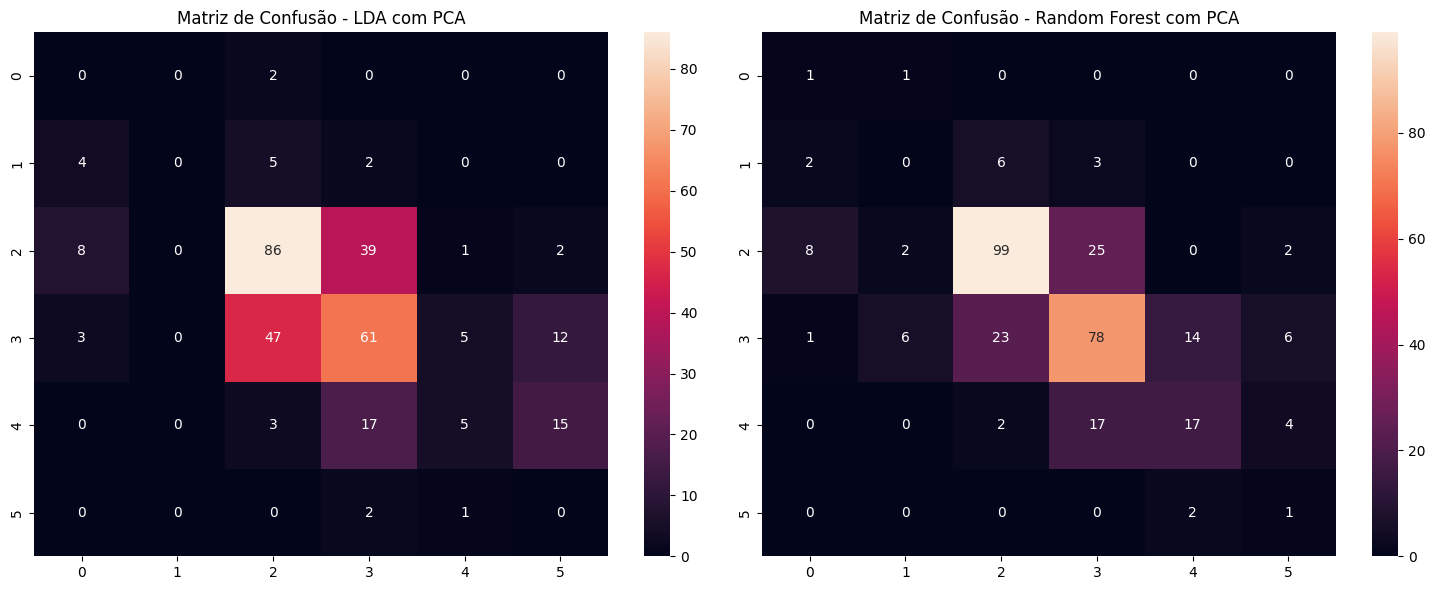

In [ ]:
# Plotando matrizes de confusão
fig, axes = plt.subplots(1, len(pipelines), figsize=(15, 6))
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusão - {name}')
plt.tight_layout()
plt.show()

In [ ]:
# Imprimindo relatórios de classificação
for name, result in results.items():
    print(f"\nRelatório de Classificação - {name}")
    print("="*50)
    print(result['report'])


Relatório de Classificação - LDA com PCA
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.60      0.63      0.62       136
           6       0.50      0.48      0.49       128
           7       0.42      0.12      0.19        40
           8       0.00      0.00      0.00         3

    accuracy                           0.47       320
   macro avg       0.25      0.21      0.22       320
weighted avg       0.51      0.47      0.48       320


Relatório de Classificação - Random Forest com PCA
              precision    recall  f1-score   support

           3       0.08      0.50      0.14         2
           4       0.00      0.00      0.00        11
           5       0.76      0.73      0.74       136
           6       0.63      0.61      0.62       128
           7       0.52      0.42      0.47        40
           8       0.08      0.33     

In [ ]:
# Análise detalhada das componentes principais
for name, pipeline in pipelines.items():
    pca = pipeline.named_steps['pca']
    print(f"\nContribuição das features para as componentes principais em {name}:")
    feat_importance = pd.DataFrame(
        abs(results[name]['loadings']).sum().sort_values(ascending=False)
    )
    feat_importance.columns = ['Importância Total']
    print(feat_importance)


Contribuição das features para as componentes principais em LDA com PCA:
     Importância Total
PC3           2.936290
PC1           2.837490
PC2           2.749198

Contribuição das features para as componentes principais em Random Forest com PCA:
     Importância Total
PC3           2.936290
PC1           2.837490
PC2           2.749198


# **Random Forest Otimizada**

In [ ]:
#!pip install imbalanced-learn

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# Separando features e target
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Otimização de Hiperparâmetros do Random Forest
def optimize_random_forest(X_train, y_train):
    # Parâmetros corrigidos
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\nMelhores parâmetros encontrados:")
    print(grid_search.best_params_)
    print("\nMelhor score de validação cruzada:", grid_search.best_score_)

    return grid_search.best_params_

In [ ]:
#Criando modelos com diferentes técnicas de balanceamento
def create_balanced_models(best_params):
    # Removendo random_state dos parâmetros se presente
    if 'random_state' in best_params:
        del best_params['random_state']

    models = {}

    # SMOTE
    models['RF_SMOTE'] = ImbPipeline([
        ('sampler', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(**best_params, random_state=42))
    ])

    # ADASYN
    models['RF_ADASYN'] = ImbPipeline([
        ('sampler', ADASYN(random_state=42)),
        ('classifier', RandomForestClassifier(**best_params, random_state=42))
    ])

    # SMOTEENN
    models['RF_SMOTEENN'] = ImbPipeline([
        ('sampler', SMOTEENN(random_state=42)),
        ('classifier', RandomForestClassifier(**best_params, random_state=42))
    ])

    # SMOTETomek
    models['RF_SMOTETomek'] = ImbPipeline([
        ('sampler', SMOTETomek(random_state=42)),
        ('classifier', RandomForestClassifier(**best_params, random_state=42))
    ])

    # Balanced Random Forest
    models['BalancedRF'] = BalancedRandomForestClassifier(
        **best_params,
        random_state=42
    )

    return models

In [ ]:
#Função para avaliar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Treinamento
    print(f"\nTreinando {model_name}...")
    model.fit(X_train, y_train)

    # Predições
    y_pred = model.predict(X_test)

    # Métricas
    print(f"\nRelatório de Classificação - {model_name}")
    print("="*50)
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    return {
        'model': model,
        'predictions': y_pred,
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

In [ ]:
#Comparação dos modelos
# def plot_model_comparison(results):
#     model_names = list(results.keys())
#     f1_scores = [results[name]['report']['weighted avg']['f1-score']
#                  for name in model_names]

#     plt.figure(figsize=(12, 6))
#     sns.barplot(x=model_names, y=f1_scores)
#     plt.title('Comparação do F1-Score Ponderado entre Modelos')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
def plot_model_comparison(results):
    # First extract the f1-scores
    model_names = list(results.keys())
    f1_scores = []

    for name in model_names:
        # Split the report into lines and get the last line (weighted avg)
        weighted_avg_line = results[name]['report'].strip().split('\n')[-1]
        # Split the line and get the f1-score (4th value)
        f1_score = float(weighted_avg_line.split()[3])
        f1_scores.append(f1_score)

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=model_names, y=f1_scores)
    plt.title('Comparação do F1-Score Ponderado entre Modelos')
    plt.xticks(rotation=45)
    plt.ylabel('F1-Score')
    plt.tight_layout()
    plt.show()

In [ ]:
#Feature Importance do melhor modelo
def plot_feature_importance(model, feature_names, title="Importância das Features"):
    if hasattr(model, 'steps'):
        importances = model.named_steps['classifier'].feature_importances_
    else:
        importances = model.feature_importances_

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='importance', y='feature')
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return importance_df

In [ ]:
# Executando o pipeline completo
print("Iniciando otimização de hiperparâmetros...")
best_params = optimize_random_forest(X_train, y_train)

print("\nCriando e avaliando modelos...")
models = create_balanced_models(best_params)

Iniciando otimização de hiperparâmetros...

Melhores parâmetros encontrados:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

Melhor score de validação cruzada: 0.6628582888142361

Criando e avaliando modelos...



Comparando modelos...


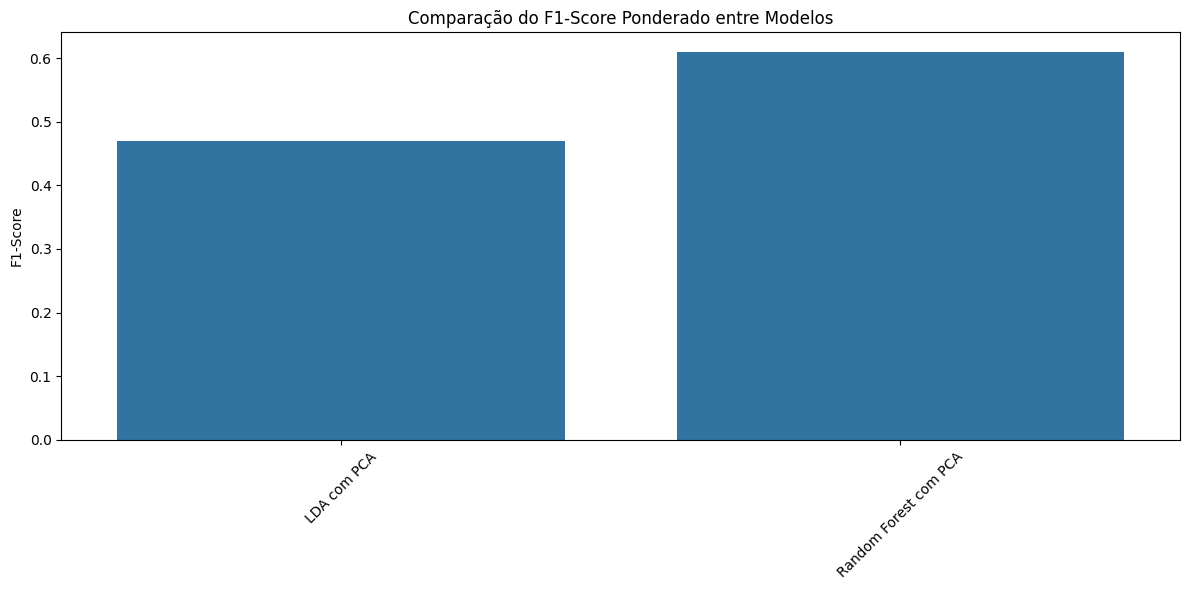

In [ ]:

# Comparando modelos
print("\nComparando modelos...")
plot_model_comparison(results)